In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
data = pd.read_csv("cleaned_data.csv")

In [18]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   26664 non-null  int64 
 1   SEX                         26664 non-null  int64 
 2   EDUCATION                   26664 non-null  int64 
 3   MARRIAGE                    26664 non-null  int64 
 4   AGE                         26664 non-null  int64 
 5   PAY_1                       26664 non-null  int64 
 6   PAY_2                       26664 non-null  int64 
 7   PAY_3                       26664 non-null  int64 
 8   PAY_4                       26664 non-null  int64 
 9   PAY_5                       26664 non-null  int64 
 10  PAY_6                       26664 non-null  int64 
 11  BILL_AMT1                   26664 non-null  int64 
 12  BILL_AMT2                   26664 non-null  int64 
 13  BILL_AMT3                   26664 non-null  in

In [22]:
X = data.LIMIT_BAL.values.reshape(-1,1)
y = data["default payment next month"].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, random_state=None)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [28]:
regressor = LogisticRegression(C=0.1, random_state=None)
regressor.fit(X_train, y_train)

LogisticRegression(C=0.1)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [30]:
y_pred = regressor.predict_proba(X_test)

In [32]:
y_pred_prob = y_pred[:,1]

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [42]:
tpr

array([0.        , 0.03122432, 0.12571898, 0.21199671, 0.22596549,
       0.36236647, 0.40016434, 0.42399343, 0.48069022, 0.50451931,
       0.54396056, 0.56532457, 0.5957272 , 0.63023829, 0.65078061,
       0.68200493, 0.70008217, 0.70912079, 0.73377157, 0.73952342,
       0.77896467, 0.79129006, 0.80443714, 0.81840592, 0.83648316,
       0.8430567 , 0.85456039, 0.86195563, 0.87263763, 0.88496302,
       0.90221857, 0.90550534, 0.91290058, 0.91618735, 0.91865242,
       0.92522597, 0.95316352, 0.95398521, 0.95809367, 0.96055875,
       0.96548891, 0.96795399, 0.96959737, 0.97288414, 0.97452753,
       0.97863599, 0.98192276, 0.98356615, 0.98438784, 0.98603122,
       0.99342646, 0.99506984, 0.99506984, 0.99671323, 0.99753492,
       0.99835661, 0.99917831, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [41]:
thresholds

array([1.48266573, 0.48266573, 0.46537307, 0.44816325, 0.4310767 ,
       0.41415269, 0.39742896, 0.38094143, 0.36472388, 0.34880774,
       0.33322184, 0.31799228, 0.30314233, 0.28869231, 0.2746596 ,
       0.26105865, 0.24790103, 0.23519549, 0.2229481 , 0.21116239,
       0.19983948, 0.18897827, 0.17857562, 0.16862655, 0.15912439,
       0.15006104, 0.14142709, 0.13321204, 0.12540449, 0.11799224,
       0.11096252, 0.10430209, 0.09799738, 0.09203461, 0.0863999 ,
       0.08107936, 0.07605918, 0.07132571, 0.06686551, 0.06266539,
       0.05871251, 0.05499433, 0.05149875, 0.04821401, 0.04512882,
       0.04223228, 0.03951397, 0.03696387, 0.03457241, 0.03233049,
       0.03022939, 0.02641702, 0.02469042, 0.02156106, 0.02014528,
       0.01758161, 0.01642275, 0.01533908, 0.01432587, 0.01249333,
       0.01166587, 0.00886436, 0.00772497, 0.00721102, 0.0054734 ])

In [43]:
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))

ROC AUC: 0.6156969654865115


* Now Applying same for EDUCATION feature of the dataset for comparing.

In [45]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data["EDUCATION"].values.reshape(-1,1),y, 
                                                    test_size=0.20, random_state=None)

In [46]:
regressor2 = LogisticRegression(C=0.1, random_state=None)
regressor2.fit(X_train2, y_train2)

LogisticRegression(C=0.1)

In [47]:
y_pred2 = regressor2.predict_proba(X_test2)

In [48]:
y_pred_prob2 = y_pred2[:,1]

In [49]:
fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_pred_prob2)

In [50]:
thresholds2

array([1.26772045, 0.26772045, 0.24472316, 0.22309949, 0.20287326])

In [53]:
print("ROC AUC using EDUCATION feature:", roc_auc_score(y_test2, y_pred_prob2))

ROC AUC using EDUCATION feature: 0.520879596653678


_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC Curve')

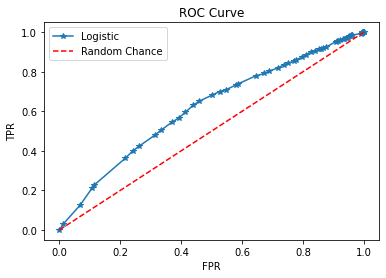

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting ROC Curve for LIMIT_BAL feature
plt.plot(fpr, tpr,"*-")
plt.plot([0,1],[0,1],"r--")
plt.legend(["Logistic","Random Chance"])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")

Text(0.5, 1.0, 'ROC Curve [Using Education]')

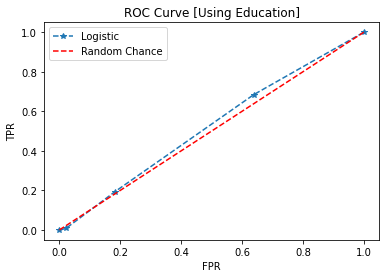

In [52]:
# PLotting ROC Curve for EDUCATION feature
plt.plot(fpr2, tpr2, "*--")
plt.plot([0,1],[0,1],"r--")
plt.legend(["Logistic","Random Chance"])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve [Using Education]")

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [55]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision Recall Curve')

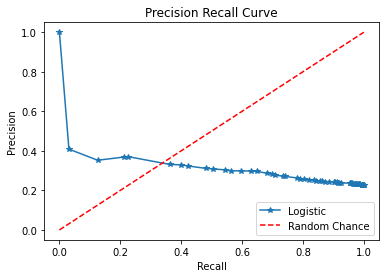

In [68]:
# Plotting precision recal curve
plt.plot(recall,precision,"*-")
plt.plot([0,1],"r--")
plt.legend(["Logistic","Random Chance"])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [69]:
# calculating area under curve
from sklearn.metrics import auc
area_under_curve = auc(recall, precision)

In [71]:
print("Area under Curve is:",area_under_curve)

Area under Curve is: 0.3212745995024099


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [73]:
y_pred_train = regressor.predict_proba(X_train)

In [74]:
y_pred_train_prob = y_pred_train[:,1]

In [75]:
roc_auc_training = roc_auc_score(y_train, y_pred_train_prob)

In [77]:
print("ROC AUC for training data:",roc_auc_training)

ROC AUC for training data: 0.619482422721197


    How is this different, conceptually and quantitatively, from your earlier calculation?


* ROC AUC score of EDUCATION was less than LIMIT_BAL which shows that LIMIT_BAL is better feature.

Author: Purvit Vashishtha